# a staright line

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [32]:
yy.shape

(100, 3)

In [356]:
# need to re-write to include K

l= 0.05 #m

n = 100
t = np.arange(0,n,1)

#state space
xr = np.arange(0,100,1)
yr = np.zeros(n)
theta_r = np.zeros(n)
vr = 0.1
lam = [1, -1, -1]

def f(t,yy):
    x = yy[0]
    y = yy[1]
    theta = yy[2]
    
    a1=-lam[1]-lam[2]
    a2=lam[1]*lam[2]
    
    K = -1 * np.array([[lam[0], 0, 0],
                      [0, a1*l/vr, a2*l/vr]])
    # K=np.array([[ 1.00000000e+00,  1.57009246e-16,  1.57009246e-16],
    #           [ 1.17756934e-17, -5.00000000e-02, -0.00000000e+00]])
    e = np.array([x - vr*t, y-1, theta])
    ud = np.array([vr,0])
    v, phi = K@e+ud
    return [v * np.cos(theta), v * np.sin(theta), v / l * np.tan(phi)]

yinit = [0, -0.5, 0.1]

yy = scipy.integrate.solve_ivp(f, [0,100], yinit, method='RK45')


Text(0, 0.5, 'y')

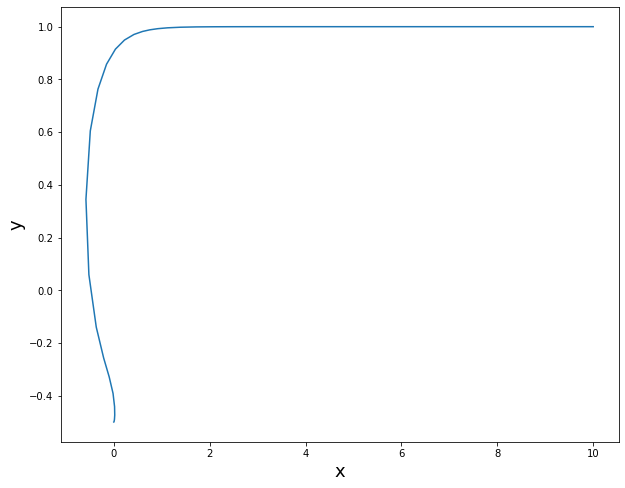

In [362]:
plt.figure(figsize=(10, 8))
plt.plot(yy.y[0],yy.y[1])
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.plot

Text(0, 0.5, 'error')

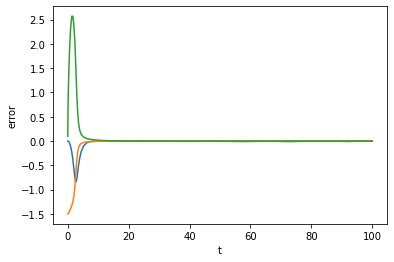

In [347]:
# plot error
plt.plot(yy.t,yy.y[0]-yy.t*vr)
plt.plot(yy.t,yy.y[1]-(1))
plt.plot(yy.t,yy.y[2])
plt.xlabel('t')
plt.ylabel('error')

In [349]:
yy = scipy.integrate.solve_ivp(f, [0,100], yinit, method='RK23')

Text(0, 0.5, 'error')

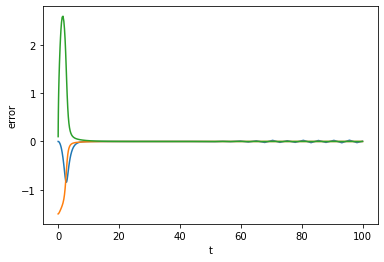

In [350]:
# plot error
plt.plot(yy.t,yy.y[0]-yy.t*vr)
plt.plot(yy.t,yy.y[1]-(1))
plt.plot(yy.t,yy.y[2])
plt.xlabel('t')
plt.ylabel('error')

# on arbitary trajectory

In [5]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


In [6]:
import autograd.numpy as np
from autograd import grad

In [353]:
l= 0.05 #m

def traj(xr):
    yr = 0.5 * np.sin(xr)
    return yr

def theta(xr):
    grad_fct = grad(traj)
    theta_r = np.arctan(grad_fct(xr))
    return theta_r

vr = 0.1 # speed on x direction
lam = [1, -1, -1]

def f(t,yy):
    x = yy[0]
    y = yy[1]
    theta = yy[2]
    
    xr = vr * t
    yr = traj(xr)
    grad_fct = grad(traj)
    theta_r = np.arctan(grad_fct(xr))
    phi_r = (np.arctan(grad_fct(xr+0.1))-np.arctan(grad_fct(xr)))*l/(vr/np.cos(theta_r))
    
    a1=-lam[1]-lam[2]
    a2=lam[1]*lam[2]
    
    K = -1 * np.array([[lam[0], 0, 0],
                      [0, a1*l/vr, a2*l/vr]])
    
    e = np.array([(x - xr) * np.cos(theta_r) + (y-yr)*np.sin(theta_r), -(x-xr)*np.sin(theta_r)+(y-yr)*np.cos(theta_r), (theta-theta_r)])
    ud = np.array([vr/np.cos(theta_r),phi_r])
    v, phi = K@e+ud
    
    return [v * np.cos(theta), v * np.sin(theta), v / l * np.tan(phi)]

yinit = [0, -.2, 0.1]

yy = scipy.integrate.solve_ivp(f, [0,100], yinit, method='RK45')



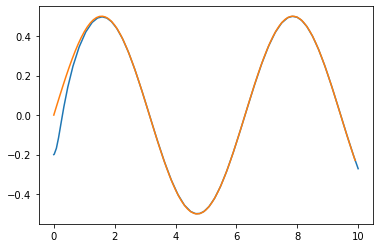

In [354]:
plt.plot(yy.y[0],yy.y[1])
x=np.arange(0,10,0.1)
plt.plot(x,0.5*np.sin(x))

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

# A = np.array([[ 0,  0, -vr*np.sin(theta_r)],
#               [ 0,  0, vr*np.cos(theta_r)],
#               [ 0,  0, 0]])
              
# B = np.array([[ np.cos(theta_r), 0],
#               [ np.sin(theta_r), 0],
#               [ np.tan(phi_r)/l, v_r/l/np.cos(phi_r)**2]])

A = np.array([[ 0,  0, 0],
              [ 0,  0, vr],
              [ 0,  0, 0]])
              
B = np.array([[ 1, 0],
              [ 0, 0],
              [ 0, vr/l]])

P = np.array([1,-1,-1])

fsf1 = signal.place_poles(A, B, P)
fsf1.gain_matrix





array([[ 1.00000000e+00, -2.18967965e-14, -2.18967965e-15],
       [-1.09483982e-15, -5.00000000e+00, -0.00000000e+00]])

In [ ]:
(-2)*l/vr

-10.0

In [338]:
def traj(xr):
    yr = 0.5 * np.sin(xr)
    return yr

def theta(xr):
    grad_fct = grad(traj)
    theta_r=[]
    for i in xr:
        theta_r.append(np.arctan(grad_fct(i)))
    return theta_r

x=np.arange(0,10,0.1)
y=traj(x)
theta=theta(x)

In [340]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [339]:
y

array([ 0.        ,  0.04991671,  0.09933467,  0.1477601 ,  0.19470917,
        0.23971277,  0.28232124,  0.32210884,  0.35867805,  0.39166345,
        0.42073549,  0.44560368,  0.46601954,  0.48177909,  0.49272486,
        0.49874749,  0.4997868 ,  0.49583241,  0.48692382,  0.47315004,
        0.45464871,  0.43160468,  0.4042482 ,  0.37285261,  0.33773159,
        0.29923607,  0.25775069,  0.21368994,  0.16749408,  0.11962466,
        0.07056   ,  0.02079033, -0.02918707, -0.07887285, -0.12777055,
       -0.17539161, -0.22126022, -0.26491807, -0.30592895, -0.34388308,
       -0.37840125, -0.40913856, -0.43578789, -0.45808297, -0.47580104,
       -0.48876506, -0.4968455 , -0.49996163, -0.4980823 , -0.49122631,
       -0.47946214, -0.46290734, -0.44172733, -0.41613372, -0.38638224,
       -0.35277016, -0.31563332, -0.27534277, -0.23230109, -0.18693833,
       -0.13970775, -0.09108125, -0.0415447 ,  0.00840695,  0.0582746 ,
        0.10755999,  0.15577068,  0.20242496,  0.24705668,  0.28

In [341]:
theta

[0.46364760900080615,
 0.4616472791138404,
 0.4556424965970442,
 0.4456231321238629,
 0.4315765008224147,
 0.4134937567444741,
 0.3913789766671426,
 0.3652609082479852,
 0.335207122267919,
 0.30133991031666313,
 0.26385271169564106,
 0.2230252019884612,
 0.17923458339921525,
 0.1329603231802893,
 0.08477986379555537,
 0.03535386391853913,
 -0.014598723955535572,
 -0.06433334612510618,
 -0.11311611539570644,
 -0.16025857740224791,
 -0.2051462729814271,
 -0.24725787954004508,
 -0.286173766753117,
 -0.32157475367301286,
 -0.3532332091587291,
 -0.38099921763232597,
 -0.4047844444086243,
 -0.4245458337303965,
 -0.440270621840136,
 -0.4519635383244488,
 -0.4596366010729208,
 -0.4633016092763693,
 -0.4629652867220663,
 -0.4586269871753954,
 -0.45027890419651984,
 -0.43790879109437814,
 -0.42150525710131975,
 -0.4010657272323106,
 -0.3766070969065042,
 -0.3481789375544691,
 -0.3158787808798515,
 -0.2798685143607494,
 -0.24039029510499033,
 -0.1977797476547955,
 -0.1524737601473603,
 -0.1050102